In [1]:
import json
import os
import sys
import random
import math
import numpy as np
import skimage.draw
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")


# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
from mrcnn import visualize
from mrcnn.config import Config

c:\users\chaeh\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chaeh\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chaeh\anaconda3\envs\maskrcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\chaeh\anaconda3\envs\maskrcnn\lib\site-packages\tensorf

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
def IoU_function(mask_real, mask_results,plot_results=True):
    
    annotation_mask = np.zeros((mask_real.shape[0], mask.shape[1]))
    for i in range(mask_real.shape[2]):
        annotation_mask = np.logical_or(annotation_mask, mask_real[:,:,i])
        #plt.imshow(annotation_mask,cmap='binary')
        #plt.show()
        
    result_mask = np.zeros((mask_results.shape[0], mask_results.shape[1]))
    for i in range(r['masks'].shape[2]):
        result_mask = np.logical_or(result_mask, mask_results[:,:,i])
        #plt.imshow(result_mask, cmap='binary')
        #plt.show()
    
    if(plot_results):
        plt.title('Annotation Mask')
        plt.imshow(annotation_mask,cmap='binary')
        plt.show()
     
        plt.title('Result Mask')
        plt.imshow(result_mask, cmap='binary')
        plt.show()
        
    intersection = np.logical_and(annotation_mask, result_mask)
    union = np.logical_or(annotation_mask, result_mask)
    
    IoU = np.sum(intersection) / np.sum(union)
    
    if(plot_results):
        colors = visualize.random_colors(2)
        IoU_image = visualize.apply_mask(image, intersection,(1.0, 0.0, 0.0), alpha=0.8)
        IoU_image = visualize.apply_mask(IoU_image, union, (0.0, 1.0, 0.0), alpha=0.3)
        plt.figure(figsize = (10,10))
        plt.text(20, 30, 'Union',bbox=dict(facecolor='green', alpha=0.5))
        plt.text(20, 50, 'Intersection',bbox=dict(facecolor='red', alpha=0.5))
        plt.title('IoU Image - Intersection over Union')
        plt.imshow(IoU_image)
        plt.show()

    return IoU;

loading annotations into memory...
Done (t=30.57s)
creating index...
index created!
76850
Processing 1 images
image                    shape: (400, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  129.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


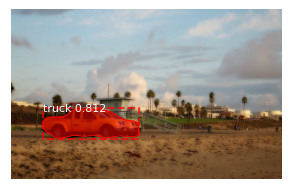

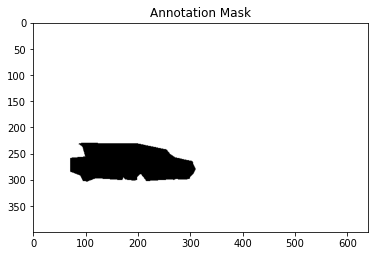

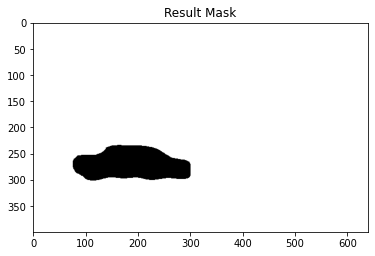

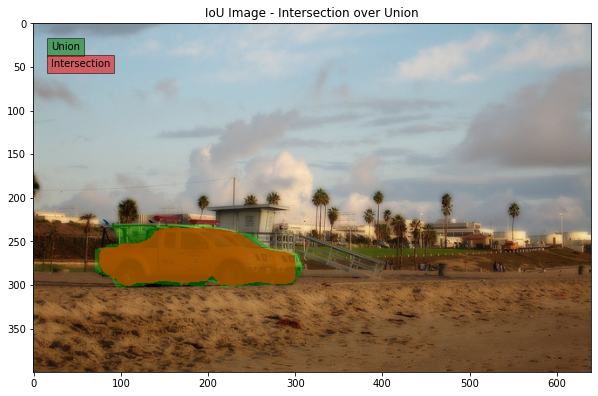

IoU: 0.8168198595932546


"\nimage_ids = np.random.choice(dataset.image_ids)\nprint(image_ids)\n#image_id = np.random.choice(dataset.image_ids)\n#print(image_id)\n#image = dataset.load_image(image_id)\n#mask, class_ids = dataset.load_mask(image_id)\n\n# Load a random image from the images folder\n#file_names = next(os.walk(IMAGE_DIR))[2]\n#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))\n\n# Run detection\nresults = model.detect([image], verbose=1)\n\n# Visualize results\nr = results[0]\nvisualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], figsize=(5,5))\nIoU = IoU_function(mask, r['masks'])\nprint('IoU:',IoU)\n"

In [21]:
COCO_DIR='C:/Users/chaeh/Mask_RCNN/samples/coco'
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train")
dataset.prepare()

IoU_list = []

image_id = np.random.choice(dataset.image_ids)
print(image_id)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
#visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], figsize=(5,5))

IoU = IoU_function(mask, r['masks'])
IoU_list.append(IoU)
print('IoU:',IoU)


    
'''
image_ids = np.random.choice(dataset.image_ids)
print(image_ids)
#image_id = np.random.choice(dataset.image_ids)
#print(image_id)
#image = dataset.load_image(image_id)
#mask, class_ids = dataset.load_mask(image_id)

# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]
#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], figsize=(5,5))
IoU = IoU_function(mask, r['masks'])
print('IoU:',IoU)
'''

In [27]:
def evaluate_model(dataset, model, cfg):

    APs =[]
    ARs =[]
    

    image_id = 76850
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
    scaled_image =modellib.mold_image(image, cfg)
    sample = np.expand_dims(scaled_image, 0)
    yhat = model.detect(sample, verbose=0)
    r = yhat[0]
    AP, pre, _, _ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
    AR, _ = utils.compute_recall(r["rois"], gt_bbox, iou=0.4) 
    ARs.append(AR)
    APs.append(AP)
    print(AP)
    print(pre)
    print(AR)
    # calculate the mean AP across all images
    mAP = np.mean(APs)
    print(mAP)
    mAR = np.mean(ARs) 
    print(mAR)
    return mAP, mAR


test_mAP, mARs_test = evaluate_model(dataset, model, config)

f_score_test = (2 * test_mAP * mARs_test)/(test_mAP + mARs_test)

print('f1-score-test', f_score_test)

[0.        0.3630834 0.        0.       ]
[0.         0.87863922 0.         0.        ]
0.0
[0. 0. 0. 0. 0. 0.]
0.5
0.0
0.5
f1-score-test 0.0
